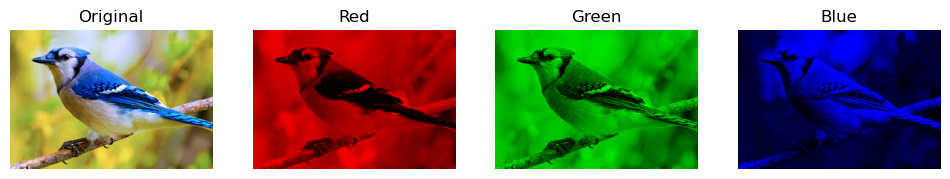

In [2]:
# bài 1
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

os.makedirs('output_images', exist_ok=True)
img = cv2.imread('bird.png')
b, g, r = cv2.split(img)
zero = np.zeros_like(b)

red_img = cv2.merge([zero, zero, r])
green_img = cv2.merge([zero, g, zero])
blue_img = cv2.merge([b, zero, zero])

cv2.imwrite('output_images/red_image.png', red_img)
cv2.imwrite('output_images/green_image.png', green_img)
cv2.imwrite('output_images/blue_image.png', blue_img)

# Hiển thị ảnh
plt.figure(figsize=(12,4))
plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(cv2.cvtColor(red_img, cv2.COLOR_BGR2RGB))
plt.title('Red')
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(cv2.cvtColor(green_img, cv2.COLOR_BGR2RGB))
plt.title('Green')
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(cv2.cvtColor(blue_img, cv2.COLOR_BGR2RGB))
plt.title('Blue')
plt.axis('off')
plt.show()

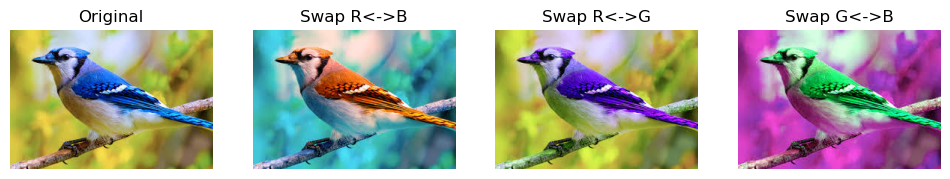

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

# Tạo thư mục lưu ảnh kết quả
os.makedirs('output_images', exist_ok=True)

# Đọc ảnh
img = cv2.imread('bird.png')  # thay bằng ảnh của bạn
b, g, r = cv2.split(img)

# Hoán đổi các kênh màu
# Đổi R <-> B
brg_img = cv2.merge([r, g, b])
# Đổi R <-> G
grb_img = cv2.merge([b, r, g])
# Đổi G <-> B
rgb_img = cv2.merge([g, b, r])

# Lưu các ảnh đã hoán đổi
cv2.imwrite('output_images/swap_rb.png', brg_img)
cv2.imwrite('output_images/swap_rg.png', grb_img)
cv2.imwrite('output_images/swap_gb.png', rgb_img)

# Hiển thị ảnh
plt.figure(figsize=(12,4))
plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(cv2.cvtColor(brg_img, cv2.COLOR_BGR2RGB))
plt.title('Swap R<->B')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(cv2.cvtColor(grb_img, cv2.COLOR_BGR2RGB))
plt.title('Swap R<->G')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB))
plt.title('Swap G<->B')
plt.axis('off')

plt.show()


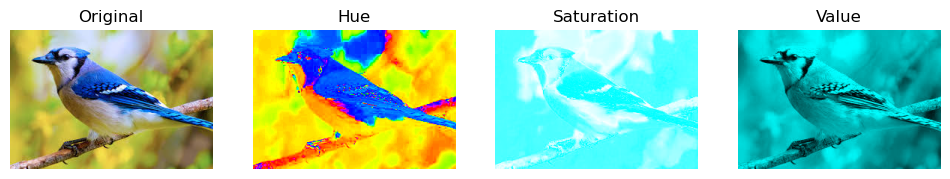

In [4]:
# bài 3
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

os.makedirs('output_hsv_images', exist_ok=True)
img = cv2.imread('bird.png')
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv_img)

hue_img = cv2.cvtColor(cv2.merge([h, 255 * np.ones_like(s), 255 * np.ones_like(v)]), cv2.COLOR_HSV2BGR)
sat_img = cv2.cvtColor(cv2.merge([90 * np.ones_like(h), s, 255 * np.ones_like(v)]), cv2.COLOR_HSV2BGR)
val_img = cv2.cvtColor(cv2.merge([90 * np.ones_like(h), 255 * np.ones_like(s), v]), cv2.COLOR_HSV2BGR)

cv2.imwrite('output_hsv_images/hue_channel.png', hue_img)
cv2.imwrite('output_hsv_images/saturation_channel.png', sat_img)
cv2.imwrite('output_hsv_images/value_channel.png', val_img)

plt.figure(figsize=(12,3))
plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(cv2.cvtColor(hue_img, cv2.COLOR_BGR2RGB))
plt.title('Hue')
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(cv2.cvtColor(sat_img, cv2.COLOR_BGR2RGB))
plt.title('Saturation')
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(cv2.cvtColor(val_img, cv2.COLOR_BGR2RGB))
plt.title('Value')
plt.axis('off')
plt.show()

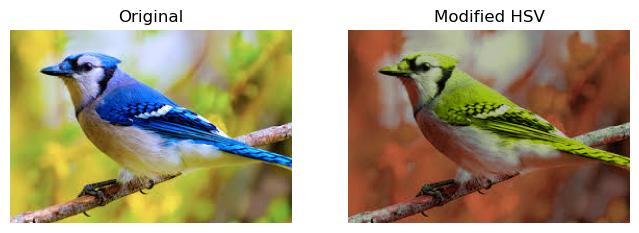

In [5]:
# bài 4
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

os.makedirs('output_modified_hsv', exist_ok=True)
img = cv2.imread('bird.png')
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv_img)
h_new = np.clip((h / 3), 0, 179).astype(np.uint8)
v_new = np.clip((v * 0.75), 0, 255).astype(np.uint8)
hsv_modified = cv2.merge([h_new, s, v_new])
result_img = cv2.cvtColor(hsv_modified, cv2.COLOR_HSV2BGR)
cv2.imwrite('output_modified_hsv/modified_hsv_image.png', result_img)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.title('Modified HSV')
plt.axis('off')
plt.show()

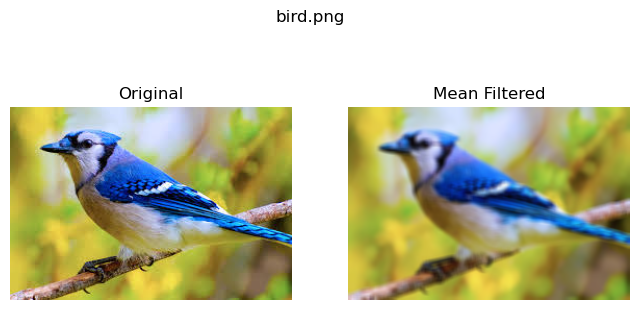

In [6]:
# bài 5
import cv2
import os
import matplotlib.pyplot as plt

input_folder = r'D:\197ct09831\LAB1'
output_folder = 'Exercise_mean_filtered'
os.makedirs(output_folder, exist_ok=True)
kernel_size = (5, 5)

for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        image_path = os.path.join(input_folder, filename)
        img = cv2.imread(image_path)
        mean_filtered = cv2.blur(img, kernel_size)
        output_path = os.path.join(output_folder, f'mean_{filename}')
        cv2.imwrite(output_path, mean_filtered)

        # Hiển thị ảnh
        plt.figure(figsize=(8,4))
        plt.subplot(1,2,1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original')
        plt.axis('off')
        plt.subplot(1,2,2)
        plt.imshow(cv2.cvtColor(mean_filtered, cv2.COLOR_BGR2RGB))
        plt.title('Mean Filtered')
        plt.axis('off')
        plt.suptitle(filename)
        plt.show()

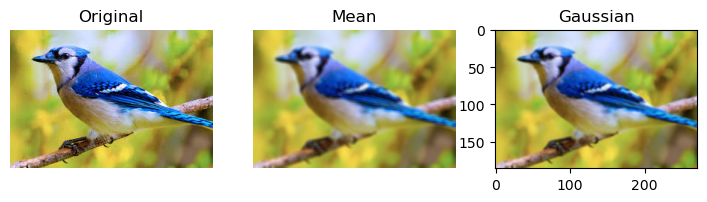

In [ ]:
# bài 6
import cv2
import os
import matplotlib.pyplot as plt

input_folder = r'D:\197ct09831\LAB1'
output_folders = {
    'mean': 'filtered_mean',
    'gaussian': 'filtered_gaussian',
    'median': 'filtered_median'
}
for folder in output_folders.values():
    os.makedirs(folder, exist_ok=True)
kernel_size = (5, 5)

for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        image_path = os.path.join(input_folder, filename)
        img = cv2.imread(image_path)
        mean_img = cv2.blur(img, kernel_size)
        cv2.imwrite(os.path.join(output_folders['mean'], f'mean_{filename}'), mean_img)
        gaussian_img = cv2.GaussianBlur(img, kernel_size, 0)
        cv2.imwrite(os.path.join(output_folders['gaussian'], f'gaussian_{filename}'), gaussian_img)
        median_img = cv2.medianBlur(img, 5)
        cv2.imwrite(os.path.join(output_folders['median'], f'median_{filename}'), median_img)

        # Hiển thị ảnh
        plt.figure(figsize=(12,4))
        plt.subplot(1,4,1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original')
        plt.axis('off')
        plt.subplot(1,4,2)
        plt.imshow(cv2.cvtColor(mean_img, cv2.COLOR_BGR2RGB))
        plt.title('Mean')
        plt.axis('off')
        plt.subplot(1,4,3)
        plt.imshow(cv2.cvtColor(gaussian_img, cv2.COLOR_BGR2RGB))
        plt.title('Gaussian')
        plt.axis('off')
        plt.subplot(1,4,4)
        plt.imshow(cv2.cvtColor(median_img, cv2.COLOR_BGR2RGB))
        plt.title('Median')
        plt.axis('off')
        plt.suptitle(filename)
        plt.show()

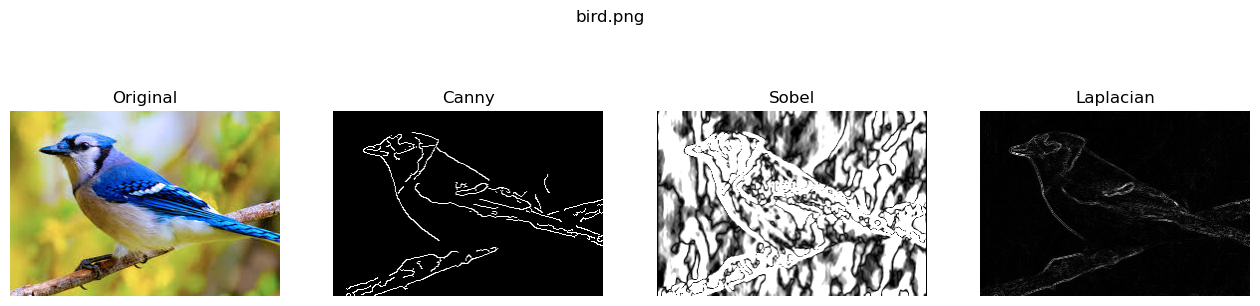

In [7]:
# bài 7
import cv2
import os
import matplotlib.pyplot as plt

input_folder = r'D:\197ct09831\LAB1'
output_folder = 'edge_detected_images'
os.makedirs(output_folder, exist_ok=True)
kernel_size = (5, 5)

for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        image_path = os.path.join(input_folder, filename)
        img = cv2.imread(image_path)
        denoised = cv2.medianBlur(img, 5)
        gray = cv2.cvtColor(denoised, cv2.COLOR_BGR2GRAY)
        edges_canny = cv2.Canny(gray, 100, 200)
        edges_sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
        edges_laplacian = cv2.Laplacian(gray, cv2.CV_64F)
        edges_sobel = cv2.convertScaleAbs(edges_sobel)
        edges_laplacian = cv2.convertScaleAbs(edges_laplacian)
        cv2.imwrite(os.path.join(output_folder, f'{filename}_canny.jpg'), edges_canny)
        cv2.imwrite(os.path.join(output_folder, f'{filename}_sobel.jpg'), edges_sobel)
        cv2.imwrite(os.path.join(output_folder, f'{filename}_laplacian.jpg'), edges_laplacian)

        # Hiển thị ảnh
        plt.figure(figsize=(16,4))
        plt.subplot(1,4,1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original')
        plt.axis('off')
        plt.subplot(1,4,2)
        plt.imshow(edges_canny, cmap='gray')
        plt.title('Canny')
        plt.axis('off')
        plt.subplot(1,4,3)
        plt.imshow(edges_sobel, cmap='gray')
        plt.title('Sobel')
        plt.axis('off')
        plt.subplot(1,4,4)
        plt.imshow(edges_laplacian, cmap='gray')
        plt.title('Laplacian')
        plt.axis('off')
        plt.suptitle(filename)
        plt.show()

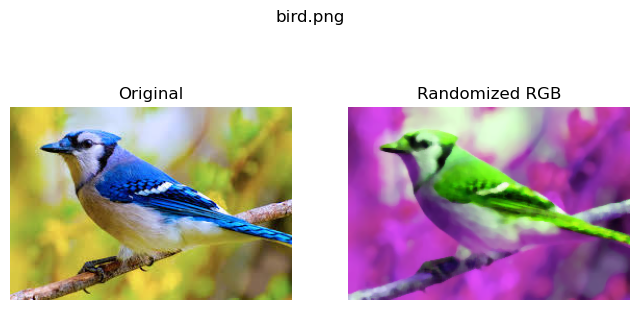

In [8]:
# bài 8
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

input_folder = r'D:\197ct09831\LAB1'
output_folder = 'color_randomized_images'
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        image_path = os.path.join(input_folder, filename)
        img = cv2.imread(image_path)
        denoised = cv2.medianBlur(img, 5)
        channels = list(cv2.split(denoised))
        np.random.shuffle(channels)
        randomized_rgb = cv2.merge(channels)
        output_path = os.path.join(output_folder, f'randomRGB_{filename}')
        cv2.imwrite(output_path, randomized_rgb)

        # Hiển thị ảnh
        plt.figure(figsize=(8,4))
        plt.subplot(1,2,1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original')
        plt.axis('off')
        plt.subplot(1,2,2)
        plt.imshow(cv2.cvtColor(randomized_rgb, cv2.COLOR_BGR2RGB))
        plt.title('Randomized RGB')
        plt.axis('off')
        plt.suptitle(filename)
        plt.show()

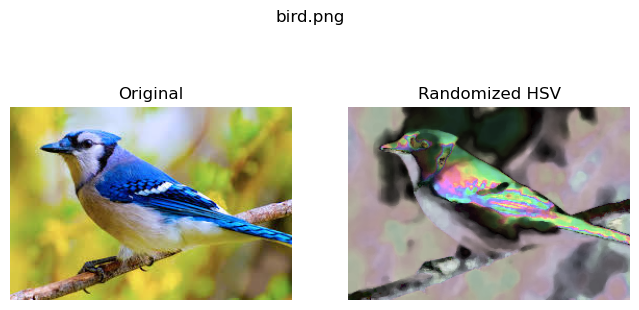

In [9]:
# bài 9
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

input_folder = r'D:\197ct09831\LAB1'
output_folder = 'hsv_randomized_images'
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        image_path = os.path.join(input_folder, filename)
        img = cv2.imread(image_path)
        denoised = cv2.medianBlur(img, 5)
        hsv_img = cv2.cvtColor(denoised, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv_img)
        channels = [h, s, v]
        np.random.shuffle(channels)
        shuffled_hsv = cv2.merge(channels)
        output_img = cv2.cvtColor(shuffled_hsv, cv2.COLOR_HSV2BGR)
        output_path = os.path.join(output_folder, f'randomHSV_{filename}')
        cv2.imwrite(output_path, output_img)

        # Hiển thị ảnh
        plt.figure(figsize=(8,4))
        plt.subplot(1,2,1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original')
        plt.axis('off')
        plt.subplot(1,2,2)
        plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
        plt.title('Randomized HSV')
        plt.axis('off')
        plt.suptitle(filename)
        plt.show()